<a href="https://colab.research.google.com/github/627Astro-mudie/627Astro-mudie1/blob/main/Task_1_Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/ML_Projects/Student_performance_data _.csv')

In [6]:
dataset.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [7]:
dataset.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [8]:
print("The Columns and the Rows are:\n",dataset.shape, "\n")
print(dataset.info())

The Columns and the Rows are:
 (2392, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
mem

In [9]:
# drop StudentID
dataset = dataset.drop(columns=['StudentID'])

In [10]:
dataset.duplicated().sum()

np.int64(0)

There are no duplicated values.

In [11]:
cat_col = dataset.select_dtypes(include=['object']).columns
print(cat_col)

Index([], dtype='object')


There are no categorical values.

In [12]:
dataset.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [13]:
# check the unique values for categorical columns
for column in ['Gender',	'Ethnicity',	'ParentalEducation',	'Tutoring',
               'ParentalSupport',	'Extracurricular',	'Sports',	'Music',	'Volunteering']:
  print(column, ':', dataset[column].unique()[:8])

Gender : [1 0]
Ethnicity : [0 2 1 3]
ParentalEducation : [2 1 3 4 0]
Tutoring : [1 0]
ParentalSupport : [2 1 3 4 0]
Extracurricular : [0 1]
Sports : [0 1]
Music : [1 0]
Volunteering : [0 1]


*  ***Ethincity***

0: Caucasian
1: African American
2: Asian
3: Other


*  ***ParentalEducation***: The education level of the parents, coded as follows:

0: None
1: High School
2: Some College
3: Bachelor's
4: Higher



*   ***ParentalSupport***: The level of parental support, coded as follows:
***bold text***
0: None
1: Low
2: Moderate
3: High
4: Very High

This Ethnicity is multi-class, unordered. So, apply one-hot encoding.



*   GradeClass: Classification of students' grades based on GPA:
**bold text**

0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)



```
# This is formatted as code
```






In [14]:
# One-hot encoding of column ethinicity as it is unordered and not binary, more cats
dataset = pd.get_dummies(dataset, columns=['Ethnicity'], drop_first=True)


In [15]:
dataset

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,False,False,False
1,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,False,False,False
2,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,False,True,False
3,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,False,False,False
4,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0,False,False,False
2388,17,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0,False,False,False
2389,16,1,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0,False,False,False
2390,16,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0,True,False,False


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   ParentalEducation  2392 non-null   int64  
 3   StudyTimeWeekly    2392 non-null   float64
 4   Absences           2392 non-null   int64  
 5   Tutoring           2392 non-null   int64  
 6   ParentalSupport    2392 non-null   int64  
 7   Extracurricular    2392 non-null   int64  
 8   Sports             2392 non-null   int64  
 9   Music              2392 non-null   int64  
 10  Volunteering       2392 non-null   int64  
 11  GPA                2392 non-null   float64
 12  GradeClass         2392 non-null   float64
 13  Ethnicity_1        2392 non-null   bool   
 14  Ethnicity_2        2392 non-null   bool   
 15  Ethnicity_3        2392 non-null   bool   
dtypes: bool(3), float64(3), 

In [17]:
dataset = dataset.astype({col: int for col in dataset.select_dtypes(include='bool').columns})


In [18]:
dataset

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,0,0,0
1,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0,0,0
2,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0,1,0
3,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0,0,0
4,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0,0,0,0
2388,17,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0,0,0,0
2389,16,1,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0,0,0,0
2390,16,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0,1,0,0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>],
       [<Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>,
        <Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>],
       [<Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>,
        <Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>],
       [<Axes: title={'center': 'GradeClass'}>,
        <Axes: title={'center': 'Ethnicity_1'}>,
        <Axes: title={'center': 'Ethnicity_2'}>,
        <Axes: title={'center': 'Ethnicity_3'}>]], dtype=object)

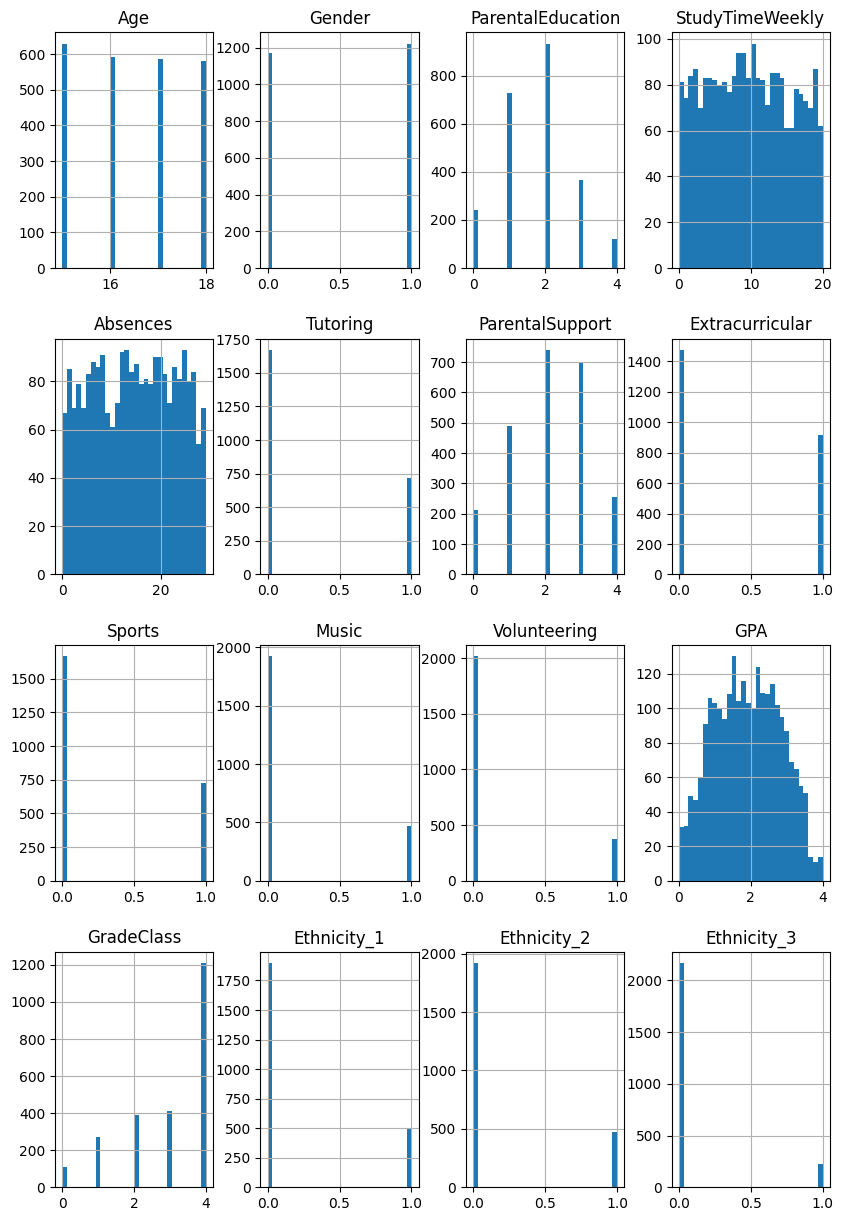

In [19]:
dataset.hist(bins=30, figsize=(10,15))

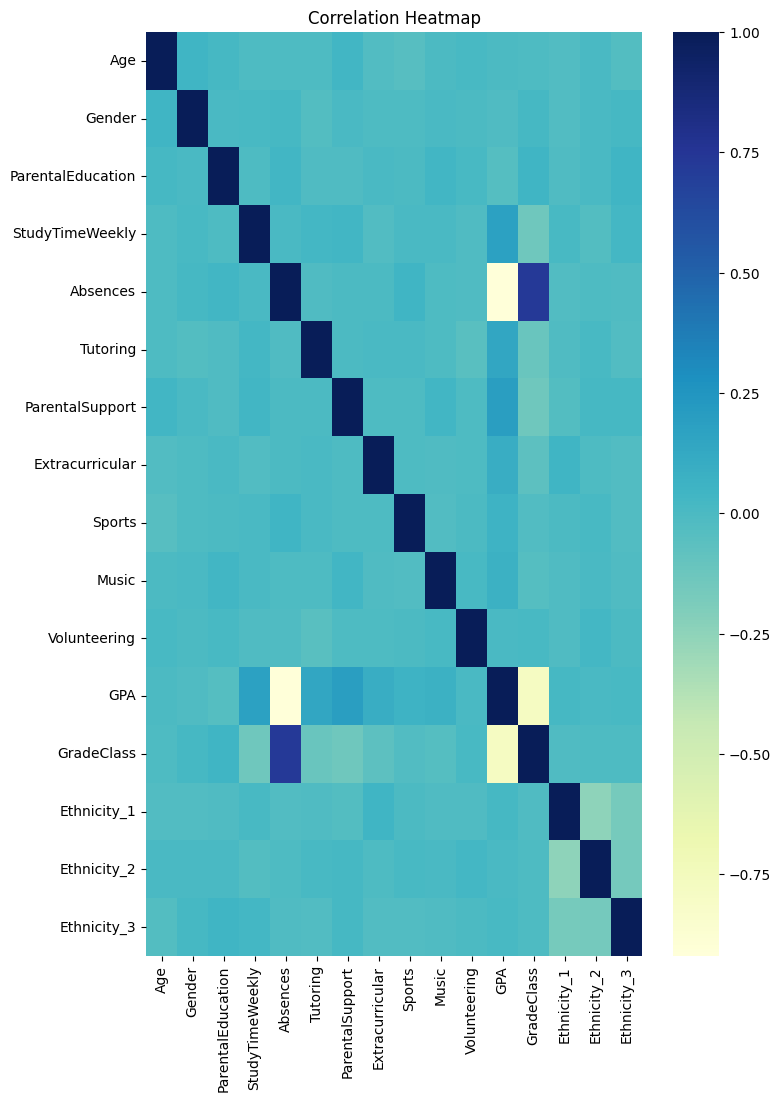

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = dataset.corr(numeric_only=True)
plt.figure(figsize=(8,12))
sns.heatmap(corr, annot=False, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

This heatmap shows us that as the absences increase, the encoded GradeClass increase, which means that in our encoded system, 0 means higher grade while 4 means lower grade. So, in conclusion, we can say that there is an strong negative correlation between absences and GradeClass.

This also shows negative correlation with StudyTimeWeekly. However, there is a positive one as we know GradeClass is encoding in reverse order.

ParentalSupport and ParentEducation also shows some positive correlation.
GPA is the most strongly correlated with GradeClass



In [28]:
dataset.groupby('Tutoring')['GradeClass'].mean()


,GradeClass
Tutoring,
0,3.074207
1,2.773925


This means that the students who opt for tutoring gets less GradeClass (better grade) compared to who dont opt.

In [29]:
dataset.groupby('ParentalEducation')['GradeClass'].mean()

,GradeClass
ParentalEducation,
0,2.979424
1,2.949176
2,2.952891
3,3.027248
4,3.308333


In [31]:
# Train/Test Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split features (X) and target (y)
X = dataset.drop(columns=['GradeClass'])
y = dataset['GradeClass']

# Train/test split (80/20 is common)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
# Initializing and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predictons
y_pred = model.predict(X_test)

In [34]:
# Evauluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse **0.5
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 0.5420138734659689
RMSE: 0.7377395325626623
R²  : 0.6357404148185082


In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)



mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly) ** 0.5
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (degree=2):")
print("MAE :", mae_poly)
print("RMSE:", rmse_poly)
print("R²  :", r2_poly)

Polynomial Regression (degree=2):
MAE : 0.3826628116303613
RMSE: 0.6336609262227929
R²  : 0.7312684037155219


In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)



mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly) ** 0.5
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (degree=2):")
print("MAE :", mae_poly)
print("RMSE:", rmse_poly)
print("R²  :", r2_poly)

Polynomial Regression (degree=2):
MAE : 0.5441382659424598
RMSE: 0.7821771309766696
R²  : 0.5905365848656291
